<h1 align="center"><strong>Logistic Regression code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

df = df.replace('?', pd.NA).dropna()  # Handle missing values

display(df.shape)
display(df.info(memory_usage='deep'))

(297, 14)

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 65.0 KB


None

In [4]:
display(df.describe().T)
display(df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


,count,unique,top,freq
ca,297,4,0.0,174
thal,297,3,3.0,164


In [5]:
display(df.nunique().sort_values(ascending=False))

chol        152
thalach      91
trestbps     50
age          41
oldpeak      40
cp            4
ca            4
restecg       3
slope         3
thal          3
sex           2
fbs           2
exang         2
target        2
dtype: int64

In [6]:
display(df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'}))

,Total No. of Missing Values
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
display(df.duplicated().sum())

0

Balance Ratio: 1.17 (1.0 = perfectly balanced)


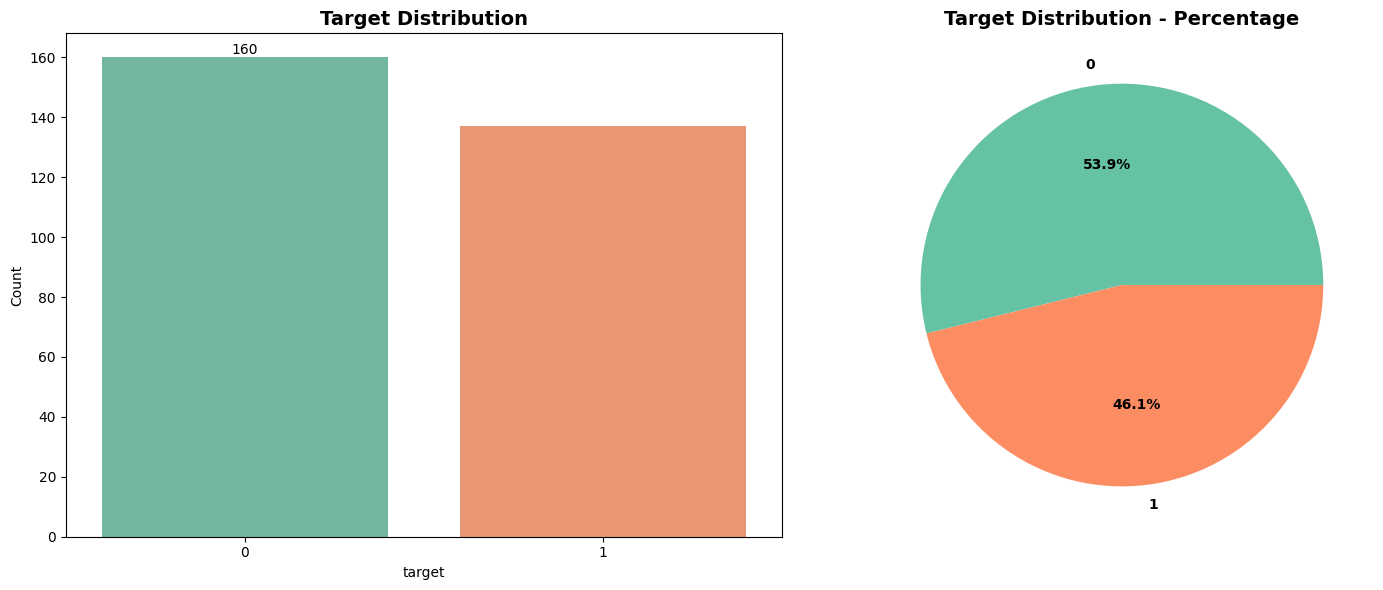

In [8]:
def target_distribution(df, target, task, title='Target Distribution', palette=None, log_scale=False):
    if task == 'classification':
        counts = df[target].value_counts()
        balance_ratio = counts.max() / counts.min() if counts.min() > 0 else float('inf')
        print(f"Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")
        
        # Generate enough colors if not provided
        if palette is None:
            palette = sns.color_palette("Set2", n_colors=len(counts))
        elif len(palette) < len(counts):
            palette = sns.color_palette(palette, n_colors=len(counts))
        
        _, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Barplot
        ax = axs[0]
        sns.barplot(x=counts.index, y=counts.values, hue=counts.index,palette=palette, legend=False, ax=ax)
        
        ax.bar_label(ax.containers[0], fmt='%d')
        ax.set_title(title, fontsize=14, weight='bold')
        ax.set_xlabel(target)
        ax.set_ylabel('Count')
        if log_scale:
            ax.set_yscale('log')
        
        # Pie chart
        ax2 = axs[1]
        ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',colors=palette, textprops={'fontweight': 'bold'})
        ax2.set_title(f"{title} - Percentage", fontsize=14, weight='bold')
        
        plt.tight_layout()
        plt.show()
    
    elif task == 'regression':
        sns.set_theme()
        sns.histplot(df[target], kde=True, bins=30)
        plt.title(title)
        plt.xlabel(target)
        plt.ylabel('Count')
        plt.show()

target_distribution(df, 'target', task='classification', palette=None, log_scale=False)

In [9]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nMissing values:")
print(f"X_train : {X_train.isnull().sum().sum()}")
print(f"X_test  : {X_test.isnull().sum().sum()}")
print(f"y_train : {y_train.isnull().sum().sum()}")
print(f"y_test  : {y_test.isnull().sum().sum()}")

X_train shape: (237, 13)
X_test  shape: (60, 13)
y_train shape: (237,)
y_test  shape: (60,)

Missing values:
X_train : 0
X_test  : 0
y_train : 0
y_test  : 0


Evaluation results: Logistic Regression
--------- Accuracy ---------
Training Accuracy : 0.8523
Testing  Accuracy : 0.8333
Balanced Accuracy : 0.8304
Difference        : 0.0190
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.8316
F1 (Micro) : 0.8333

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



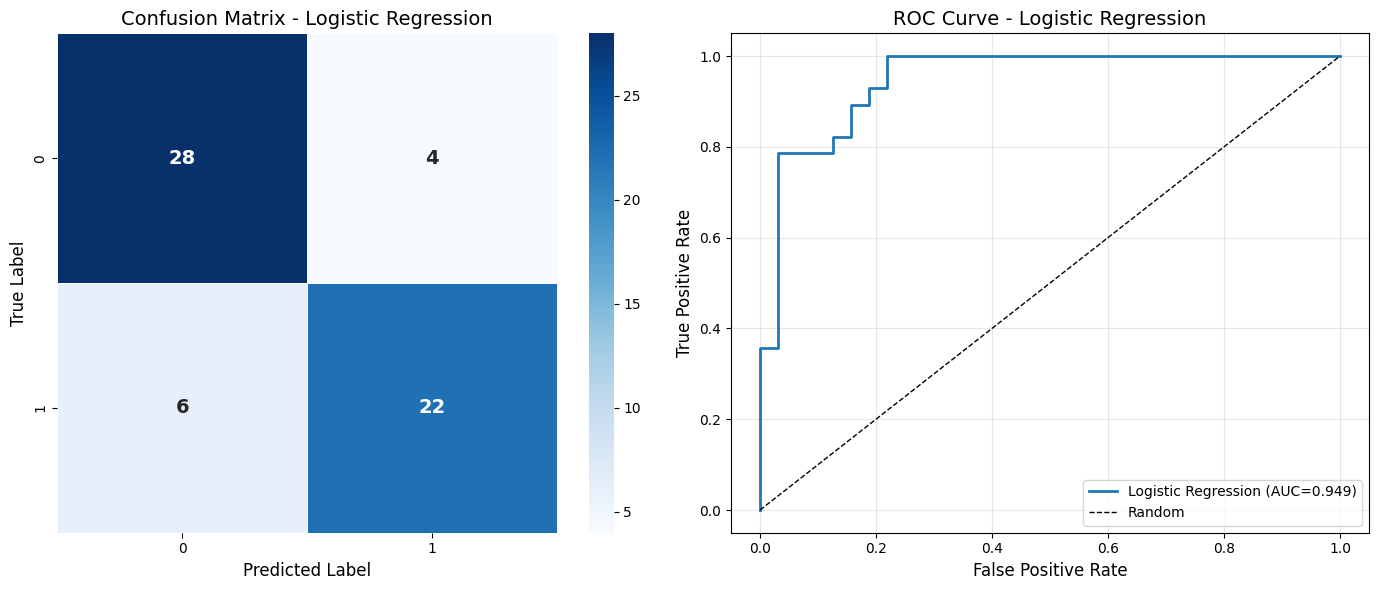

In [10]:
lr_model = LogisticRegression(random_state=42,max_iter=1000)
lr_model.fit(X_train, y_train)

def classification_evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model", plot=True, verbose=True):
    import time
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score)
    start_time = time.time()
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Probabilities (if available)
    y_test_proba = None
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    bal_acc   = balanced_accuracy_score(y_test, y_test_pred)
    
    # Extra metrics
    f1_macro  = f1_score(y_test, y_test_pred, average="macro")
    f1_micro  = f1_score(y_test, y_test_pred, average="micro")
    
    end_time = time.time()
    elapsed  = end_time - start_time
    
    if verbose:
        print(f"{'='*60}")
        print(f"Evaluation results: {model_name}")
        print(f"{'='*60}")
        print(f"--------- Accuracy ---------")
        print(f"Training Accuracy : {train_acc:.4f}")
        print(f"Testing  Accuracy : {test_acc:.4f}")
        print(f"Balanced Accuracy : {bal_acc:.4f}")
        print(f"Difference        : {abs(train_acc - test_acc):.4f}")
        if abs(train_acc - test_acc) > 0.05:
            print("⚠️ Possible overfitting detected!")
        else:
            print("✅ Good generalization!")
        
        print(f"\n--------- Extra Metrics (Test Set) ---------")
        print(f"F1 (Macro) : {f1_macro:.4f}")
        print(f"F1 (Micro) : {f1_micro:.4f}")
        
        print(f"\n--------- Classification Report ---------")
        print(classification_report(y_test, y_test_pred))
    
    # Plots (subplot style)
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor='white',cbar=True, square=True, annot_kws={"size": 14, "weight": "bold"}, ax=axes[0])
        axes[0].set_xlabel("Predicted Label", fontsize=12)
        axes[0].set_ylabel("True Label", fontsize=12)
        axes[0].set_title(f"Confusion Matrix - {model_name}", fontsize=14)
        
        # ROC Curve
        auc = None
        if y_test_proba is not None:
            if y_test_proba.shape[1] == 2:  # Binary
                y_score = y_test_proba[:, 1]
                auc = roc_auc_score(y_test, y_score)
                fpr, tpr, _ = roc_curve(y_test, y_score)
                axes[1].plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc:.3f})')
                axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
                axes[1].set_xlabel('False Positive Rate', fontsize=12)
                axes[1].set_ylabel('True Positive Rate', fontsize=12)
                axes[1].set_title(f'ROC Curve - {model_name}', fontsize=14)
                axes[1].legend()
                axes[1].grid(True, alpha=0.3)
            else:  # Multi-class
                auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
                axes[1].axis("off")
                axes[1].text(0.5, 0.5, f"Multi-class AUC (OVR): {auc:.3f}", ha="center", va="center", fontsize=14, weight="bold")
        else:
            axes[1].axis("off")
            axes[1].text(0.5, 0.5, "No Probabilities Available", ha="center", va="center", fontsize=12, style="italic")
        
        plt.tight_layout()
        plt.show()
    
    return {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "bal_acc": bal_acc,
        "f1_macro": f1_macro,
        "f1_micro": f1_micro,
        "auc": auc,
        "time_sec": elapsed
    }

results = classification_evaluate_model(lr_model, X_train, X_test, y_train, y_test, model_name="Logistic Regression", plot=True, verbose=True)

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

<h1 align="center"><strong>work on logistic as multi classification code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>



In [11]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.shape

(150, 5)

In [13]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Balance Ratio: 1.00 (1.0 = perfectly balanced)


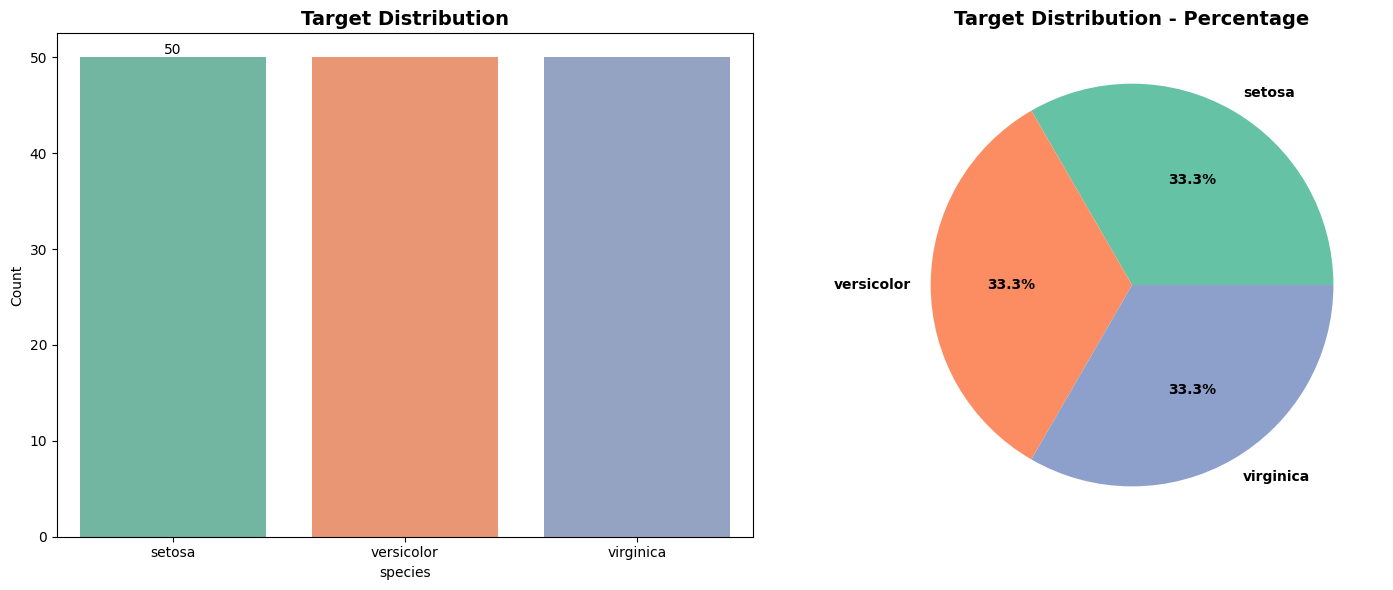

In [14]:
target_distribution(df, 'species', task='classification')

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 14.4 KB


In [16]:
display(df.describe().T)
display(df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


,count,unique,top,freq
species,150,3,setosa,50


In [17]:
display(df.nunique().sort_values(ascending=False))
display(df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'}))
display(df.duplicated().sum())

df.drop_duplicates(inplace=True)

petal_length    43
sepal_length    35
sepal_width     23
petal_width     22
species          3
dtype: int64

,Total No. of Missing Values
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


1

# **OvR**

In [18]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nMissing values:")
print(f"X_train : {X_train.isnull().sum().sum()}")
print(f"X_test  : {X_test.isnull().sum().sum()}")
print(f"y_train : {y_train.isnull().sum().sum()}")
print(f"y_test  : {y_test.isnull().sum().sum()}")

X_train shape: (119, 4)
X_test  shape: (30, 4)
y_train shape: (119,)
y_test  shape: (30,)

Missing values:
X_train : 0
X_test  : 0
y_train : 0
y_test  : 0


Evaluation results: One Vs Rest Classifier
--------- Accuracy ---------
Training Accuracy : 0.9664
Testing  Accuracy : 1.0000
Balanced Accuracy : 1.0000
Difference        : 0.0336
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 1.0000
F1 (Micro) : 1.0000

--------- Classification Report ---------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



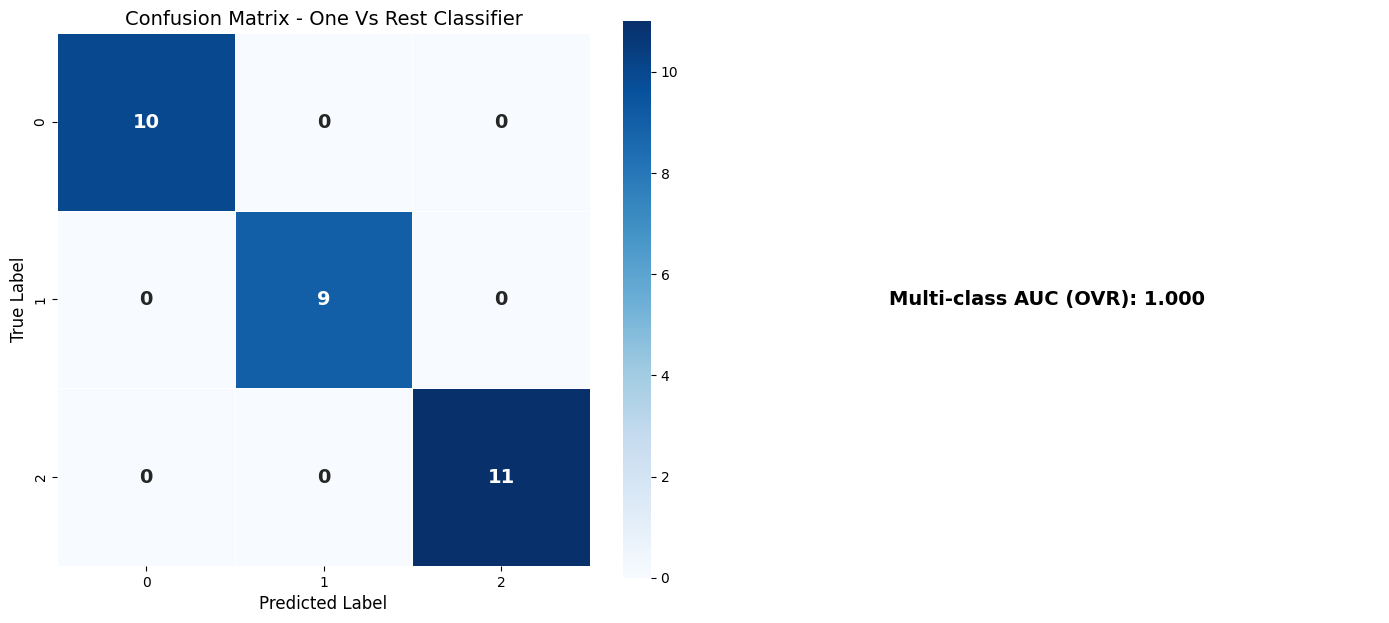

In [19]:
from sklearn.multiclass import OneVsRestClassifier

OneVsRest = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
OneVsRest.fit(X_train, y_train)

results = classification_evaluate_model(OneVsRest, X_train, X_test, y_train, y_test, model_name="One Vs Rest Classifier", plot=True, verbose=True)

# **OvO**

In [20]:
df=df[df['species']!='setosa']

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Balance Ratio: 1.02 (1.0 = perfectly balanced)


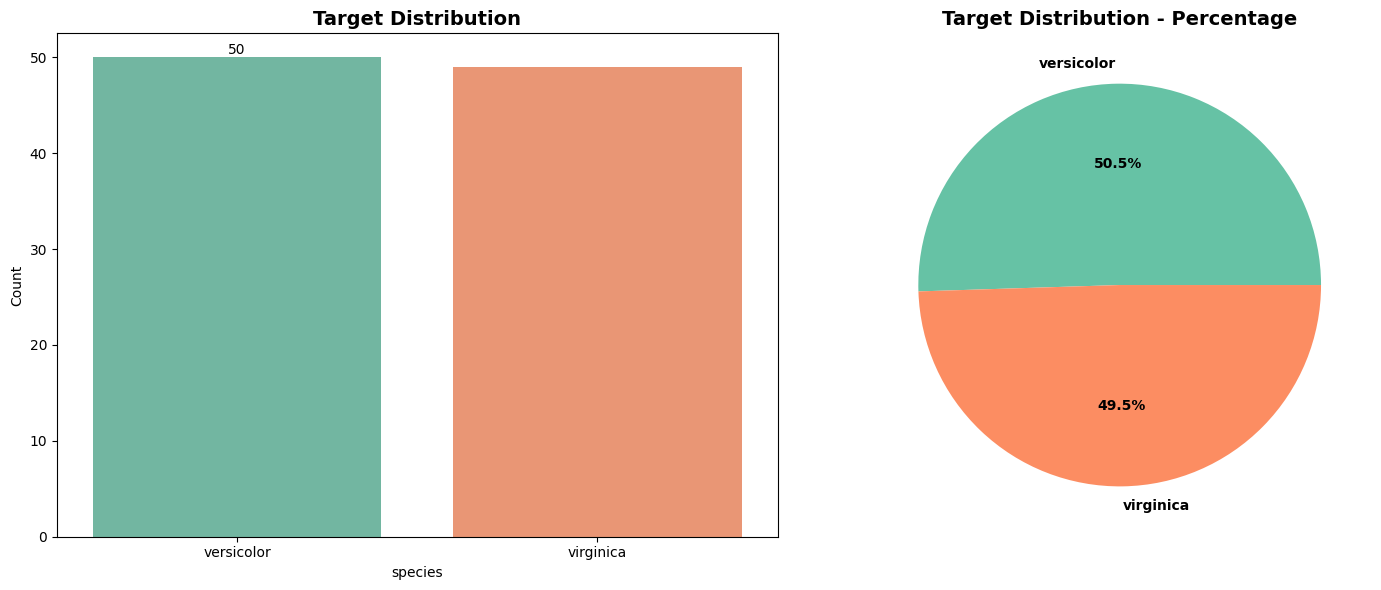

In [22]:
target_distribution(df, 'species', task='classification')

In [23]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [24]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nMissing values:")
print(f"X_train : {X_train.isnull().sum().sum()}")
print(f"X_test  : {X_test.isnull().sum().sum()}")
print(f"y_train : {y_train.isnull().sum().sum()}")
print(f"y_test  : {y_test.isnull().sum().sum()}")

X_train shape: (79, 4)
X_test  shape: (20, 4)
y_train shape: (79,)
y_test  shape: (20,)

Missing values:
X_train : 0
X_test  : 0
y_train : 0
y_test  : 0


In [25]:
from sklearn.model_selection import GridSearchCV

classifier=LogisticRegression()

# Create regularization penalty space
parameter={'penalty':['l2'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=10)

In [26]:
classifier_regressor.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l2']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [27]:
print(classifier_regressor.best_params_)
print(classifier_regressor.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.9625


Evaluation results: Logistic Regression with GridSearchCV
--------- Accuracy ---------
Training Accuracy : 0.9620
Testing  Accuracy : 0.9500
Balanced Accuracy : 0.9375
Difference        : 0.0120
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.9467
F1 (Micro) : 0.9500

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



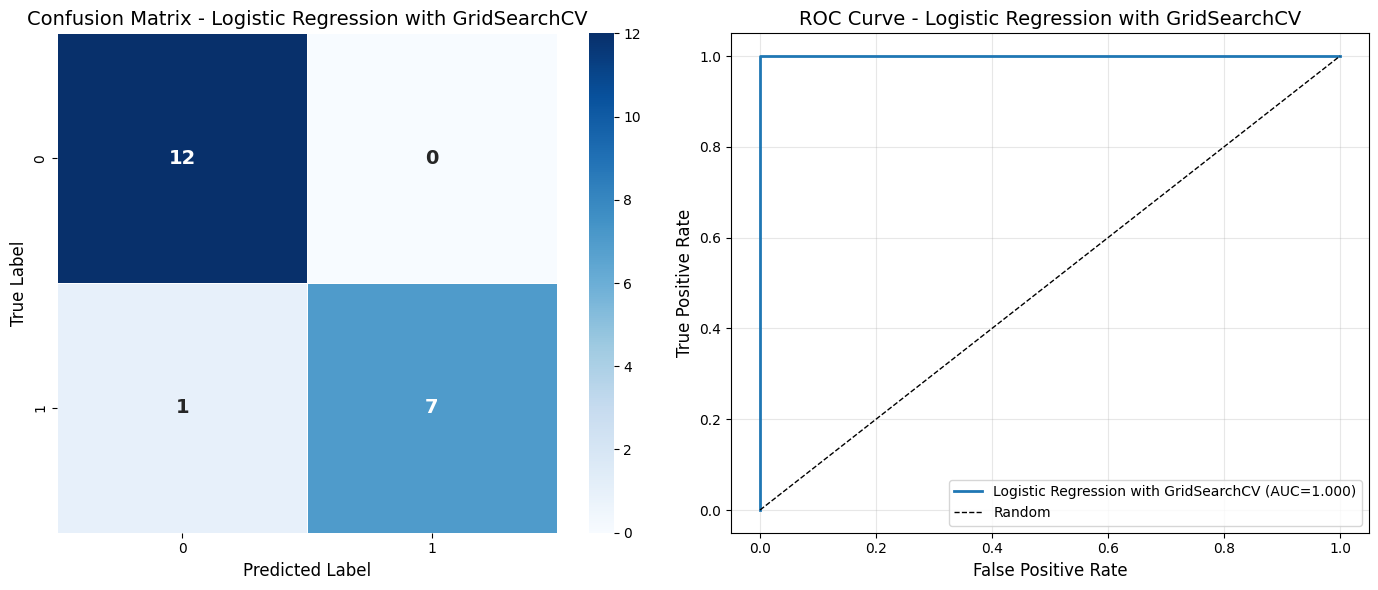

In [28]:
results = classification_evaluate_model(classifier_regressor, X_train, X_test, y_train, y_test, model_name="Logistic Regression with GridSearchCV", plot=True, verbose=True)

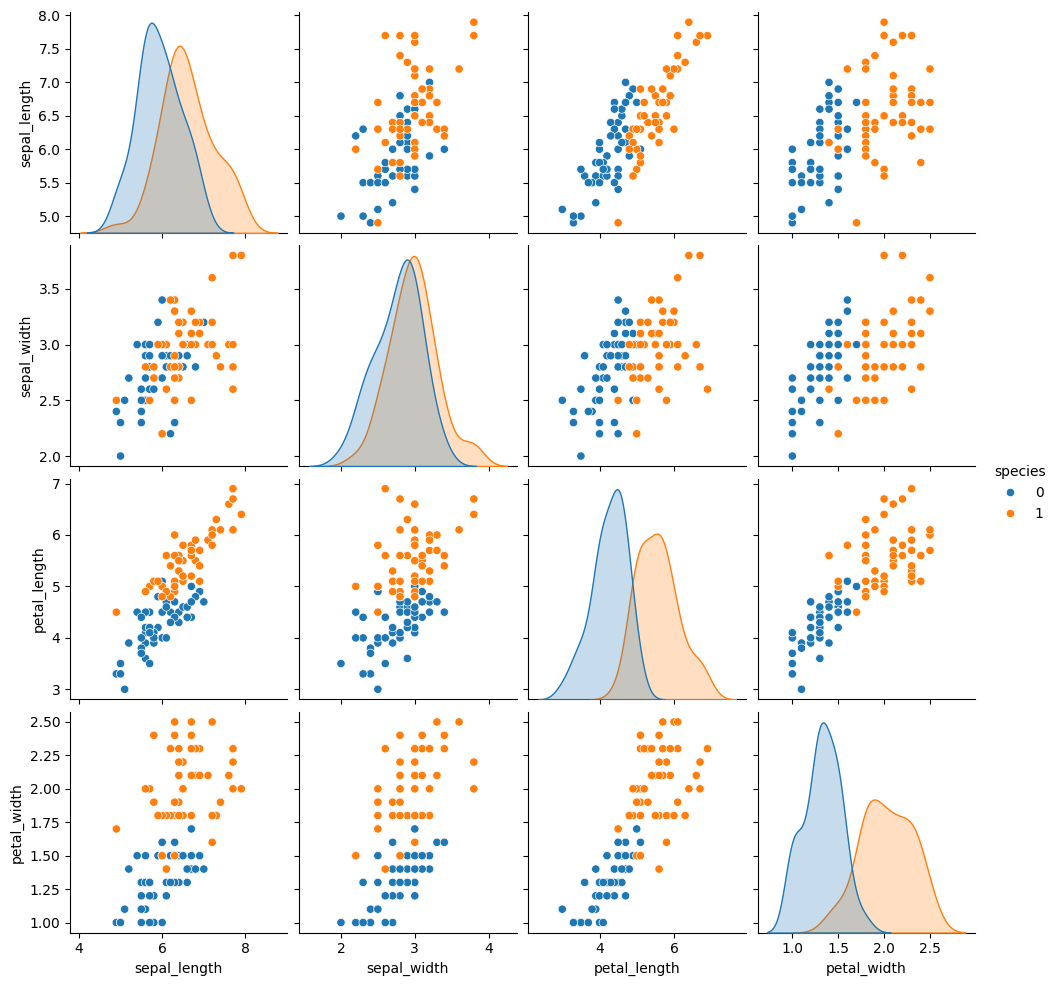

In [29]:
sns.pairplot(df,hue='species')
plt.show()

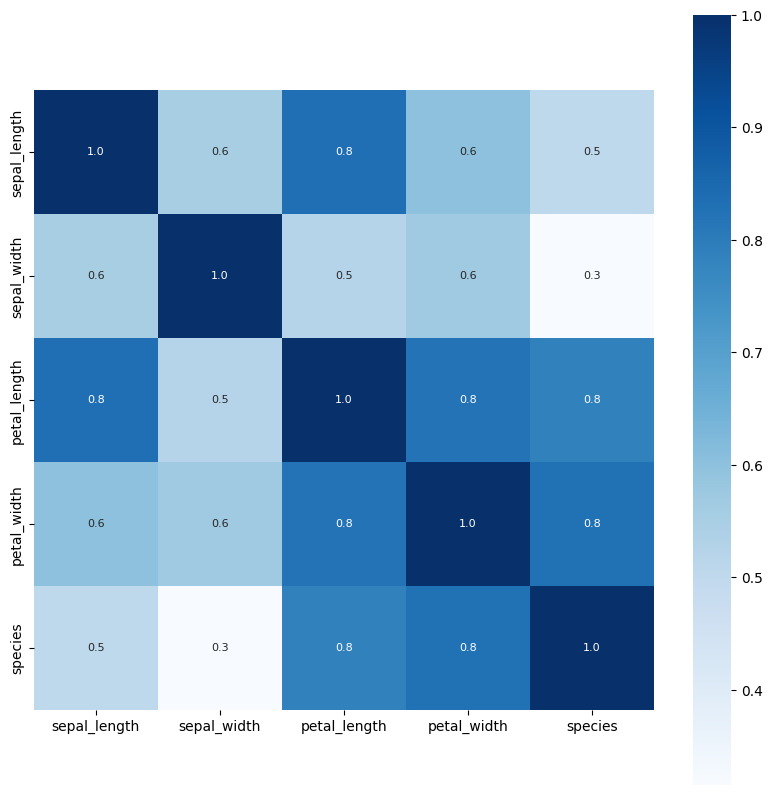

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()